<a href="https://colab.research.google.com/github/kolikaran1992/Neural-Networks-in-Numpy/blob/main/Dense_Neural_Network_in_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE**

Let, $F(x): R^m \rightarrow R$, then,

$\nabla_xF = [\frac{\partial F}{\partial x_1} \dots \frac{\partial F}{\partial x_m}]$

$x$ was a column vector, but $\nabla_xF$ is a row vector, therefore, when applying gradients in gradient descent, a convention that gradient should be shape according to variables should be followed, therefore the actual usable gradient in gradient descent would be $\nabla_xF^T$

The example presented here will be a multiclass classification problem, this can be generalized for regression as well, all that will be needed to do is to change some gradients

**ASSUMPTIONS**

1. $m$: batch size
2. $n$: number of features in the input
3. $c$: number of classes
4. $X$: training batch (dimension = $n \times m$)
5. $x$: one instance (column vector) in the training batch (dimension = $n \times 1$)
6. $Y$: true batch classes (matrix of one hot vectors of dimension $c \times m$)
7. $y$: one instance (column vector) of true classes of dimension $c \times 1$
8. $\hat{y}$: one instance of predicted classes of dimension $c \times 1$ (vector of real number which sums to unity)

The loss function to be used is cross entropy loss
$$J(y, \hat{y}) = -\sum_{i=1}^{c}y_i \ log(\hat{y}_i)$$

# MATH

Let's suppose the network has $Q$ hidden layers, this means the network has $Q+2$ layers in total when input and output layers are included

Let $W^i, b^i; i \in [1, Q]$ be the paramters of hidden layers and $W^{out}, b^{out}$ be the paramters of the output layer


$z^{i} = W^{i}a^{i-1}+b^{i}$

$a^{i} = \text{Act}(z^i)$

Where, $a^{0}=x$

Let's look at the output layer

$z^{out} = W^{out}a^{Q}+b^{out}$

$\hat{y}=\text{softmax}(z^{out})$

$J = -\sum_{i=1}^{c}y_i log \ \hat{y}_i$

The model has $Q+1$ sets of parameters, we need to calculate gradients wrt these parameters

## GRADIENT WRT $b^{out}$

$\nabla_{b^{out}}J=\nabla_{\hat{y}}J\nabla_{z^{out}}\hat{y}\nabla_{b^{out}}z^{out}$

Since we need to differentiate $z^{out}$ wrt $b^{out}$ therefore, in this scenario, $z^{out}:R^c \rightarrow R^c$, therefore the gradient $\nabla_{b^{out}}z^{out} \in R^{c \times c}$

$\nabla_{b^{out}}z^{out} = \begin{bmatrix} \frac{\partial z_1^{out}}{\partial b_1^{out}} \dots \frac{\partial z_1^{out}}{\partial b_c^{out}} \\ \vdots \\  \frac{\partial z_c^{out}}{\partial b_1^{out}} \dots \frac{\partial z_c^{out}}{\partial b_c^{out}} \end{bmatrix} = I_{c \times c}$

For $\nabla_z^{out}\hat{y}$, since differentiating wrt $z^{out}$, $\hat{y}: R^c \rightarrow R^c$

$\nabla_{z^{out}}\hat{y} = \begin{bmatrix} \frac{\partial \hat{y}_1}{\partial z_1^{out}} \dots \frac{\partial \hat{y}_1}{\partial z_c^{out}} \\ \vdots \\ \frac{\partial \hat{y}_c}{\partial z_1^{out}} \dots \frac{\partial \hat{y}_c}{\partial z_c^{out}} \end{bmatrix}$

$\frac{\partial \hat{y}_i}{\partial z_j^{out}} = \begin{cases} \hat{y}_i(1-\hat{y}_i) \quad; i==j  \\ -\hat{y}_i \hat{y}_j \quad \quad \ \ ; i \neq j\end{cases}$

$\nabla_{z^{out}}\hat{y} = \begin{bmatrix} \hat{y}_1(1-\hat{y}_1) \dots -\hat{y}_1\hat{y}_c \\ \vdots \\ -\hat{y}_c\hat{y}_1 \dots \hat{y}_c(1-\hat{y}_c) \end{bmatrix}$ 

$\nabla_\hat{y}J = -[\frac{y_1}{\hat{y}_1} \dots \frac{y_c}{\hat{y}_c}] = -[\frac{y}{\hat{y}}]^T$

## GRADIENT WRT $W^{out}$

$\nabla_{W^{out}}J=\nabla_{\hat{y}}J\nabla_{z^{out}}\hat{y}\nabla_{W^{out}}z^{out}$

$z_{i}^{out}= \sum_{k=1}^{n}W_{ik}^{out}a_{k}^Q$, therefore, $\frac{\partial z_{i}^{out}}{\partial W_{jk}^{out}} = \begin{cases} a_{k}^Q \quad; i=j \\ 0 \quad ; i \neq j\end{cases}$


$\nabla_{W^{out}}z^{out}=\begin{bmatrix} \begin{bmatrix} - a^Q - \\ \vdots \\ -0-\end{bmatrix} \dots \begin{bmatrix} - 0 - \\ \vdots \\ -a^Q-\end{bmatrix}\end{bmatrix}$

Since $\nabla_{\hat{y}}J\nabla_{z^{out}}\hat{y}$ repeats in both gradient calculations, let $G = \nabla_{\hat{y}}J\nabla_{z^{out}}\hat{y}$

$$G = \nabla_{\hat{y}}J\nabla_{z^{out}}\hat{y}=-[\frac{y_1}{\hat{y}_1} \dots \frac{y_c}{\hat{y}_c}]_{1 \times c}\begin{bmatrix} \hat{y}_1(1-\hat{y}_1) \dots -\hat{y}_1\hat{y}_c \\ \vdots \\ -\hat{y}_c\hat{y}_1 \dots \hat{y}_c(1-\hat{y}_c) \end{bmatrix}_{c \times c}=[\hat{y}-y]^T_{1 \times c}$$

$\implies \nabla_{b^{out}}J=G\nabla_{b^{out}}z=GI=G$

$\implies \nabla_{W^{out}}J=G\nabla_{W^{out}}z^{out}$

## GRADIENT WRT $b^{i}$



$\nabla_{b^{i}}J=\nabla_{\hat{y}}J\nabla_{z^{out}}\hat{y}\nabla_{b^{i}}z^{out}$

$z^{out} = W^{out}a^{Q}+b^{out} \\ \implies \nabla_{b^i}z^{out}=\nabla_{b^i}[W^{out}a^{Q}] + \nabla_{b^i}b^{out} \\ =\nabla_{a^Q}[W^{out}a^{Q}]\nabla_{b^i}a^{Q} + 0 = W^{out}\nabla_{b^i}a^{Q}$




$a^Q=\text{Act}(z^Q) \\ \implies \nabla_{b^i}a^Q=\nabla_{b^i}\text{Act}(z^Q) \\ =\nabla_{z^Q}\text{Act}(z^Q) \nabla_{b^i}z^Q$



$z^Q = W^Qa^{Q-1} + b^Q \\ \implies \nabla_{b^i}z^{Q} = \nabla_{b^i}[W^Qa^{Q-1}] + \nabla_{b^i}b^Q \\ =\nabla_{a^{Q-1}}[W^Qa^{Q-1}] \nabla_{b^i}a^{Q-1} + 0 = W^Q\nabla_{b^i}a^{Q-1}$

This keeps on repeating until we reach $a^i$, in which case

$a^i = \text{Act}(z^i) \implies \nabla_{b^i}a^i=\nabla_{z^i}\text{Act}(z^i) \nabla_{b^i}z^i$


$z^i = W^ia^{i-1}+b^i \implies \nabla_{b^i}z^i=I$

$\implies \nabla_{b^i}z^{out} = W^{out}\nabla_{z^Q}\text{Act}(z^Q)W^Q  \dots \nabla_{z^{i+1}}\text{Act}(z^{i+1}) W^{i+1}I$

$\implies \nabla_{b^{i}}J = GW^{out}\nabla_{z^Q}\text{Act}(z^Q)W^Q  \dots \nabla_{z^{i+1}}\text{Act}(z^{i+1}) W^{i+1}I$, where, $i \in [1, Q-1]$

## GRADIENT WRT $W^{i}$



$\nabla_{W^{i}}J=\nabla_{\hat{y}}J\nabla_{z^{out}}\hat{y}\nabla_{W^{i}}z^{out}$

$z^{out} = W^{out}a^{Q}+b^{out} \\ \implies \nabla_{W^i}z^{out}=\nabla_{W^i}[W^{out}a^{Q}] + \nabla_{W^i}b^{out} \\ =\nabla_{a^Q}[W^{out}a^{Q}]\nabla_{W^i}a^{Q} + 0 = W^{out}\nabla_{W^i}a^{Q}$



$a^Q=\text{Act}(z^Q) \\ \implies \nabla_{W^i}a^Q=\nabla_{W^i}\text{Act}(z^Q) \\ =\nabla_{z^Q}\text{Act}(z^Q) \nabla_{W^i}z^Q$

## $\nabla_{z^i}\text{Act}(z^i)$

Since $\text{Act}(z^i)$ is an element wise vector valued function, the gradient wrt it's argument ($z^i$) will always be a diagonal matrix

Consider the example below

Let $\text{Act}(x) = \text{ReLU}(x) = \begin{cases} x \quad; x > 0 \\ 0 \quad; x \leq 0 \end{cases}, x \in R$

$\frac{d}{dx} \text{ReLU}(x) = \begin{cases} 1 \quad; x >0 \\ 0 \quad; x \leq 0\end{cases}$

$\implies \nabla_{z^i}\text{ReLU}(z^i) = \text{diagonal}([\frac{d}{dx} \text{ReLU}(z^i_1) \dots \frac{d}{dx} \text{ReLU}(z^i_{n_i})])$. Assuming there are $n_i$ units in the current layer




$z^Q = W^Qa^{Q-1} + b^Q \\ \implies \nabla_{W^i}z^{Q} = \nabla_{W^i}[W^Qa^{Q-1}] + \nabla_{W^i}b^Q \\ =\nabla_{a^{Q-1}}[W^Qa^{Q-1}] \nabla_{W^i}a^{Q-1} + 0 = W^Q\nabla_{W^i}a^{Q-1}$

This keeps on repeating until we reach $a^i$, in which case

$a^i=\text{Act}(z^i) \implies \nabla_{W^i}z^i=\nabla_{W^i}\text{Act}(z^i)=\nabla_{z^i}\text{Act}(z^i) \nabla_{W^i}z^i$

$z^i = W^ia^{i-1}+b^i \implies \nabla_{W^i}z^i=\begin{bmatrix} \begin{bmatrix} - a^{i-1} - \\ \vdots \\ -0-\end{bmatrix} \dots \begin{bmatrix} - 0 - \\ \vdots \\ -a^{i-1}-\end{bmatrix}\end{bmatrix}$

$\implies \nabla_{W^i}z^{out} = W^{out}\nabla_{z^Q}\text{Act}(z^Q)W^Q \dots \nabla_{z^{i+1}}\text{Act}(z^{i+1})W^{i+1}\nabla_{W^i}z^i$

$\implies \nabla_{W^{i}}J = GW^{out}\nabla_{z^Q}\text{Act}(z^Q)W^Q \dots \nabla_{z^{i+1}}\text{Act}(z^{i+1})W^{i+1}\nabla_{W^i}z^i$, where, $i \in [1, Q-1]$

# IMPLEMENTATION



In [ ]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_wine, make_circles, make_moons
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
import time
SEED = 49

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.titlesize': 20, 
                     'axes.labelsize': 15,
                     'xtick.labelsize':10,
                     'ytick.labelsize':10
                     })

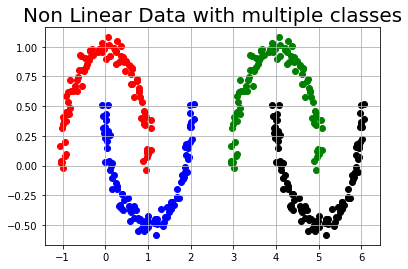

In [ ]:
n = 200
X1, y1 = make_moons(n_samples=n, random_state=SEED, noise=0.05)
X2, y2 = make_moons(n_samples=n, random_state=SEED, noise=0.05)
X2[:, 0] = X2[:, 0] + 4
y2 = y2 + 2
X, y = np.r_[X1, X2], np.r_[y1, y2]

colors = ['red', 'blue', 'green', 'black']
temp = np.zeros((y.size, y.max()+1))
temp[np.arange(y.size), y] = 1
y = temp

plt.title('Non Linear Data with multiple classes')
for cls in np.unique(y.argmax(axis=-1)):
    idxs = np.where(y.argmax(axis=-1) == cls)
    plt.scatter(X[idxs, 0], X[idxs, 1], color=colors[cls])

plt.grid()
plt.show()

## INIT PARAMS



In [ ]:
# batch size
m = 4

## ACTIVATIONS

In [ ]:
def relu(x):
    """
    x: numpy vector (shape=(batch_size, n))
    """
    neg_mask = np.where(x <= 0)
    x[neg_mask] = 0
    return x

def grad_relu(x):
    """
    x: numpy vector (shape=(batch_size, n))
    """
    grad = np.zeros((x.shape[0], x.shape[1], x.shape[1]))
    idxs = np.arange(x.shape[1])
    grad[:, idxs, idxs] = (x > 0).astype(int)

    return grad

def grad_softmax(x):
    """
    x: numpy vector (shape=(batch_size, n))
    """
    ## tile along axis 1 by first
    ## expanding dims along axis 1
    ## then multiplying by ones
    ## substract by I
    ## multiply along axis 1 by x.T

    x_ = np.expand_dims(x, axis=1)
    grad = np.eye(x.shape[1]) - (x_ * np.ones((x.shape[1], 1)))
    grad = np.transpose(x_, axes=(0,2,1)) * grad

    return grad

In [ ]:
x = np.random.normal(size=(m,4))
x

array([[-1.16679977,  0.14399644, -0.81413409,  0.05442385],
       [-0.62113985, -0.22144308,  1.17637246, -1.09831468],
       [ 1.06238236, -0.42337158,  0.81657401, -0.78376378],
       [ 0.56914055,  0.86095188, -0.58595437,  0.74351089]])

In [ ]:
print('RELU\n\nactivation:\n{}\n\ngradient:\n{}'.format(relu(x), grad_relu(x)))

RELU

activation:
[[0.         0.14399644 0.         0.05442385]
 [0.         0.         1.17637246 0.        ]
 [1.06238236 0.         0.81657401 0.        ]
 [0.56914055 0.86095188 0.         0.74351089]]

gradient:
[[[0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]]]


In [ ]:
print('SOFTMAX\n\nactivation:\n{}\n\ngradient:\n{}'.format(softmax(x, axis=1), grad_softmax(x)))

SOFTMAX

activation:
[[0.23748388 0.27426539 0.23748388 0.25076685]
 [0.16018992 0.16018992 0.51943025 0.16018992]
 [0.40431241 0.13974307 0.31620145 0.13974307]
 [0.24417887 0.32691898 0.13820809 0.29069406]]

gradient:
[[[ 0.         -0.          0.         -0.        ]
  [ 0.          0.12326147  0.         -0.00783684]
  [ 0.         -0.          0.         -0.        ]
  [ 0.         -0.00783684  0.          0.05146189]]

 [[ 0.          0.         -0.          0.        ]
  [ 0.          0.         -0.          0.        ]
  [ 0.          0.         -0.20747971  0.        ]
  [ 0.          0.         -0.          0.        ]]

 [[-0.06627392  0.         -0.86751382  0.        ]
  [-0.          0.         -0.          0.        ]
  [-0.86751382  0.          0.1497809   0.        ]
  [-0.          0.         -0.          0.        ]]

 [[ 0.24521958 -0.49000263  0.         -0.4231622 ]
  [-0.49000263  0.11971374  0.         -0.6401271 ]
  [-0.         -0.          0.         -0.   

In [ ]:
## use this for calculating activations
ACTIVATIONS = {
    'relu': relu,
    'softmax': lambda x: softmax(x, axis=1)
}

## use this for calculating gradients
GRADS = {
    'relu': grad_relu,
    'softmax': grad_softmax
}

## DEFINE LAYER

In [ ]:
class Layer(object):
    def __init__(self, 
                 in_size=None, ## size of the input vector
                 out_size=None, ## size of output vector
                 activation=None ## activation function on logits
    ):
        """
        in_size: int
        out_size: int
        activation: str
        """
        self.activation = activation

        ## init params from standard normal
        self.W = np.random.normal(size=(out_size, in_size))
        self.b = np.random.normal(size=(out_size,1))

        # store activation for backward step
        # to avoid calculation multiple times
        self.z = None

    def forward(self,
                in_vec ## input vector = x, previous layer's activation
                        ## shape = m,n, transpose to make column vectors
                ):
        ### calculate logits
        ## z = Wx+b
        ## return a = activation(z)

        ## (out_size, in_size) * (in_size, m) = (out_size, m)
        z = np.matmul(self.W, in_vec.T) + self.b

        ## reshape to (m, out_size)
        z = z.T
        assert z.shape == (m, self.W.shape[0])

        self.z = z

        ### apply non linearity
        a = ACTIVATIONS[self.activation](z)
        
        return a
    
    def backward(self, 
                 in_vec,
                 G, ## backpropagated grads
                 lr ## learning rate
                 ):
        ## in_vec = previous layer's acivation
        ## G = matrix that needs to be multiplied for backpropagation

        ## multiply G by gradient of activation
        ## (m, 1, out)*(m,out,out) = (m,1,out)
        usable_G = np.matmul(G, 
                             GRADS[self.activation](self.z))

        # updated G = usable_G*W
        ## update G before updating params
        ## (m, 1, out)*(out, in) = (m, 1, in)
        ## in for this layer will be out for previous layer
        upd_G = np.matmul(usable_G, self.W)
        assert upd_G.shape == (m, 1, self.W.shape[1])

        ## nabla_b_i J = usable_GI = usable_G
        ## average along batch
        grad_b = usable_G.mean(axis=0).T
        assert grad_b.shape == self.b.shape

        self.b -= lr*grad_b

        # gradient wrt W = usable_G nabla_W_z
        ## reshape usable_G for matmul
        reshaped_G =  np.expand_dims(usable_G, axis=1)
        assert reshaped_G.shape == (m,1,1, self.W.shape[0])

        nabla_W_z = (np.eye(self.W.shape[0])[np.newaxis, :, :, np.newaxis]*in_vec[:, np.newaxis, np.newaxis, :])
        assert nabla_W_z.shape == (m, self.W.shape[0], self.W.shape[0], self.W.shape[1])

        gradient_W_loss = np.matmul(reshaped_G, nabla_W_z)
        assert gradient_W_loss.shape == (m, self.W.shape[0], 1, self.W.shape[1])

        ## reduce dims along axis=2
        gradient_W_loss = gradient_W_loss.reshape(m, self.W.shape[0], self.W.shape[1])

        ## average along batch
        gradient_W_loss = gradient_W_loss.mean(axis=0)
        self.W -= lr*gradient_W_loss

        return upd_G

In [ ]:
layer = Layer(in_size=X.shape[1], 
              out_size=y.shape[1], 
              activation='softmax')
rand_idxs = np.random.randint(0, len(X), size=m)

x = X[rand_idxs, :]

y_pred = layer.forward(x)
y_true = y[rand_idxs, :]
y_pred, y_true

(array([[4.23879232e-03, 7.04677360e-03, 4.34586335e-02, 9.45255801e-01],
        [1.88879943e-04, 1.22622522e-04, 6.80417044e-03, 9.92884327e-01],
        [2.20375556e-04, 1.28892194e-04, 3.60471695e-03, 9.96046015e-01],
        [2.61878328e-02, 9.76837532e-02, 2.33797331e-01, 6.42331083e-01]]),
 array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]]))

## DEFINE NETWORK

In [ ]:
def forward_pass(in_vec, W_out, b_out):
    vec = in_vec
    for lyr in layers:
        vec = lyr.forward(vec)
    
    z_out = np.matmul(W_out, vec.T) + b_out
    z_out = z_out.T

    y_hat = softmax(z_out, axis=1)

    return y_hat

In [ ]:
def back_propagation(in_vec, lr, y_true, W_out, b_out):
    vec = in_vec
    inputs = []

    for lyr in layers:
        inputs.append(vec)
        vec = lyr.forward(vec)

    z_out = np.matmul(W_out, vec.T) + b_out
    z_out = z_out.T

    y_hat = softmax(z_out, axis=1)

    batch_loss = np.sum(-y_true*np.log(y_hat+1e-8), axis=1)

    ## calculate gradients for last layer seperately
    ## to avoid numerical overflow

    G = np.expand_dims(y_hat-y_true, axis=1)
    assert G.shape == (m, 1, W_out.shape[0])

    back_G = np.matmul(G, W_out)

    b_out -= lr*G.mean(axis=0).T

    nabla_W_z = (np.eye(W_out.shape[0])[np.newaxis, :, :, np.newaxis]*vec[:, np.newaxis, np.newaxis, :])
    assert nabla_W_z.shape == (m, W_out.shape[0], W_out.shape[0], W_out.shape[1])

    #print(G.shape, nabla_W_z.shape)

    gradient_W_loss = np.matmul(np.expand_dims(G, axis=1), nabla_W_z)
    assert gradient_W_loss.shape == (m, W_out.shape[0], 1, W_out.shape[1])

    ## reduce dims along axis=2
    gradient_W_loss = gradient_W_loss.reshape(m, W_out.shape[0], W_out.shape[1])

    ## average along batch
    gradient_W_loss = gradient_W_loss.mean(axis=0)
    W_out -= lr*gradient_W_loss

    for idx in range(len(layers)):
        lyr = layers[len(layers)-1-idx]
        vec = inputs[len(layers)-1-idx]
        back_G = lyr.backward(vec, back_G, lr)

    return batch_loss, W_out, b_out

In [ ]:
m = 64
epoch_losses = []
config = {
    'hidden_1': {'in_size': X.shape[1], 'out_size': 64, 'activation': 'relu'},
    'hidden_2': {'in_size': 64, 'out_size': 128, 'activation': 'relu'},
    'output': {'in_size': 128, 'out_size': y.shape[1], 'activation': 'softmax'}
}

## init params for the output layer
W_out = np.random.random((config['output']['out_size'], config['output']['in_size']))
b_out = np.random.random((config['output']['out_size'], 1))

## define hidden layers
layers = [Layer(**v) for k, v in config.items() if k != 'output']

lr = 5e-4

num_epochs = 30
for epoch in range(num_epochs):
    ## loop train_size//batch_size times
    epoch_loss = 0
    start = time.time()
    for batch_num in range(len(X)//m + 1):
        rand_idxs = np.random.randint(0, X.shape[0], size=m)
        
        batch_loss, W_out, b_out = back_propagation(X[rand_idxs, :], 
                                                    lr, 
                                                    y[rand_idxs, :], W_out, b_out)
        
        epoch_loss += batch_loss.sum()
    print('epoch {} done in {:.2f}s'.format(epoch+1, time.time()-start))
    epoch_losses.append(epoch_loss/(batch_num+1)*m)


epoch 1 done in 3.35s
epoch 2 done in 3.33s
epoch 3 done in 3.30s
epoch 4 done in 3.36s
epoch 5 done in 3.30s
epoch 6 done in 3.31s
epoch 7 done in 3.35s
epoch 8 done in 3.33s
epoch 9 done in 3.30s
epoch 10 done in 3.31s
epoch 11 done in 3.31s
epoch 12 done in 3.34s
epoch 13 done in 3.29s
epoch 14 done in 3.37s
epoch 15 done in 3.31s
epoch 16 done in 3.34s
epoch 17 done in 3.34s
epoch 18 done in 3.34s
epoch 19 done in 3.33s
epoch 20 done in 3.34s
epoch 21 done in 3.35s
epoch 22 done in 3.32s
epoch 23 done in 3.35s
epoch 24 done in 3.32s
epoch 25 done in 3.33s
epoch 26 done in 3.35s
epoch 27 done in 3.33s
epoch 28 done in 3.31s
epoch 29 done in 3.30s
epoch 30 done in 3.31s


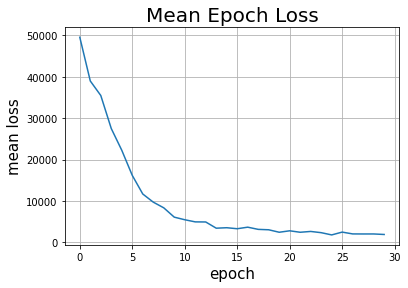

In [ ]:
#epoch_losses = epoch_losses[4:]
plt.title('Mean Epoch Loss')
plt.plot(range(len(epoch_losses)), epoch_losses)
plt.xlabel('epoch')
plt.ylabel('mean loss')
plt.grid()
plt.show()

In [ ]:
all_y_hat = []
for batch_num in range(len(X)//m):
    y_hat = forward_pass(X[m*batch_num: m*(batch_num+1), :], W_out, b_out)
    all_y_hat.append(y_hat)
all_y_hat = np.concatenate(all_y_hat, axis=0)

In [ ]:
conf_mat = confusion_matrix(y[:len(all_y_hat)].argmax(axis=-1), 
                 all_y_hat.argmax(axis=-1), labels = [0,1,2,3])
prec = np.diag(conf_mat)/conf_mat.sum(axis=0)
rec = np.diag(conf_mat)/conf_mat.sum(axis=1)
f1 = 2*prec*rec/(prec+rec)

res_df = pd.DataFrame(conf_mat, columns = ['{}_pred'.format(i) for i in [0,1,2,3]],
                      index = ['{}_true'.format(i) for i in [0,1,2,3]])
res_df['precision'] = prec
res_df['recall'] = rec
res_df['f1'] = f1
res_df

,0_pred,1_pred,2_pred,3_pred,precision,recall,f1
0_true,84,9,0,7,0.840000,0.840000,0.840000
1_true,16,82,0,2,0.901099,0.820000,0.858639
2_true,0,0,82,16,0.872340,0.836735,0.854167
3_true,0,0,12,74,0.747475,0.860465,0.800000
